In [1]:
%run Data_Science_Preprocessing.ipynb

2020-12-01 10:57:06 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-12-01 10:57:06 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-12-01 10:57:06 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-12-01 11:36:34 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
durchwachstumfnl.describe()

,AGR
count,16.000000
mean,0.604699
std,0.016762
min,0.575814
25%,0.597707
50%,0.601303
75%,0.609862
max,0.649319


Durchwachstumfnl sind die prognostizierten durchschnittlichen täglichen Wachstumsraten aller deutschen Bundesländer. Prognosen wurden mithilfe von erhobenen Daten bis zum 30.06 berechnet.

In [4]:
compLK.describe()

,AGR,AGR_D,Bev.D.Ew./km²
count,280.000000,280.000000,280.000000
mean,9.658100,12.272411,341.725000
std,16.102230,72.953839,431.041806
min,2.245455,-0.450450,39.000000
25%,5.321871,1.963652,109.750000
50%,6.408620,3.071789,169.000000
75%,7.517026,4.179298,339.250000
max,152.113099,1131.448160,2954.000000


compLK sind die durchschnittlichen täglichen Wachstumsraten deutscher Landkreis und die Bevölkerungsdichte jedes deutschen Landkreises. 

In [5]:
DFCounty[['AGR','Density']].describe()

,AGR,Density
count,1607.000000,1607.000000
mean,3.683416,91.152116
std,1.786995,596.305345
min,0.333333,0.196519
25%,2.436664,6.526914
50%,3.499712,17.148318
75%,4.665372,45.521004
max,16.825131,18671.140601


DFCounty sind die durchschnittlichen täglichen Wachstumsraten us-amerikanischer Counties. Sie sind mit deutschen Landkreisen vergleichbar. Außerdem wurd noch dieBevölkerungsdichte mit Daten von 2010 erhoben. Da es in den USA keine Einwohnermeldeämter gibt machen sie alle 10 Jahre eine Volkszählung. Die letzte Volkszählung war 2010. 

Über d[] lassen sich deutsche Landkreise aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und Toden und deren tägliche Veränderung. Damit wurde compLK berechnet.

In [6]:
dic['Albany County'].describe()

,cases,dailycases,Rate
count,150.000000,150.000000,150.000000
mean,707.613333,13.660000,6.408761
std,776.322209,17.232259,19.794056
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,312.000000,9.000000,0.767365
75%,1490.250000,20.000000,4.137996
max,2049.000000,98.000000,150.000000


Über dic[] lassen sich amerikanische Counties aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und deren tägliche Veränderung. Damit wurde DFCounty berechnet.

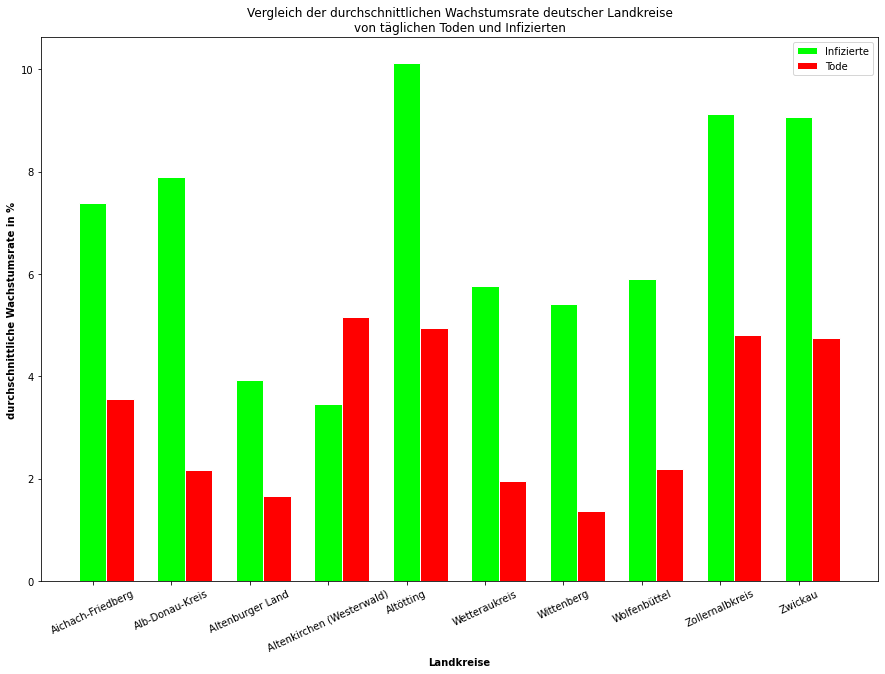

In [53]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLKbar = pd.DataFrame()
compLK = compLK.loc[compLK['Landkreise/Kreis'] != 'Würzburg']
compLKbar = compLK.iloc[:5]
compLKbar = compLKbar.append(compLK.tail(5))
#compLKbar.plot(kind='bar', x = 'Landkreise/Kreis', y= 'AGR', ax=ax,label='durchschnittliche Wachstumsrate')

labels = compLKbar['Landkreise/Kreis']
width = 0.35  # the width of the bars
bars1 = compLKbar['AGR']
bars2 = compLKbar['AGR_D']
 
# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + 0.35 for x in r1]

plt.bar(r1, bars1, color='#00ff00', width=0.35, edgecolor='white', label='Infizierte')
plt.bar(r2, bars2, color='#ff0000', width=0.35, edgecolor='white', label='Tode')

plt.title('Vergleich der durchschnittlichen Wachstumsrate deutscher Landkreise\nvon täglichen Toden und Infizierten')
plt.xlabel('Landkreise', fontweight='bold')
plt.ylabel('durchschnittliche Wachstumsrate in %', fontweight='bold')
ax.set_xticklabels(labels)
ax.set_xticks(r1)
plt.xticks(rotation = 25)

plt.legend()
plt.show()

Wie man sehen kann haben die meisten Landkreise hatten die meisten Landkreise bis ende Juni durchschnittlich täglich 10% mehr Coronafälle. Es gibt zwar auch Ausreißer, wie zum Beispiel Wittenberg.

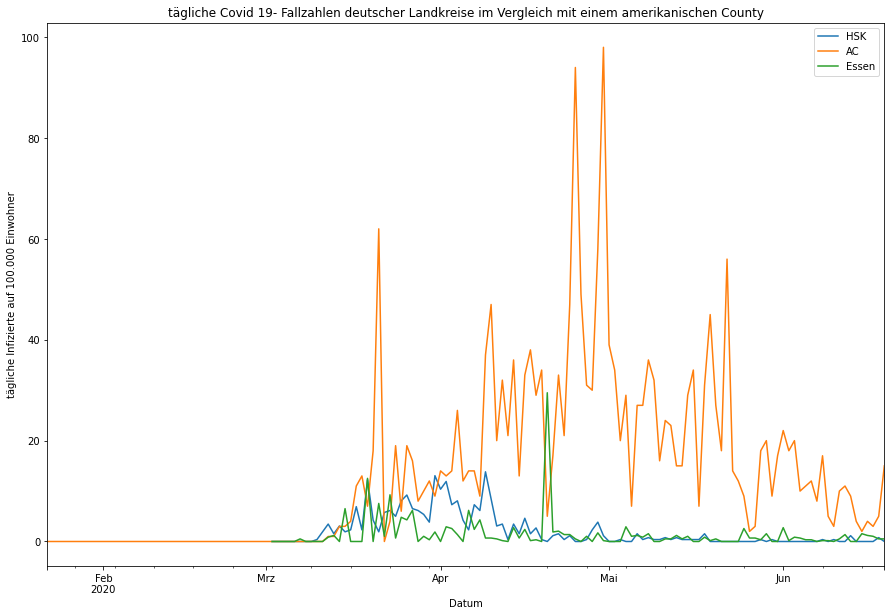

In [8]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte auf 100.000 Einwohner')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen auf 100.000 Einwohner')

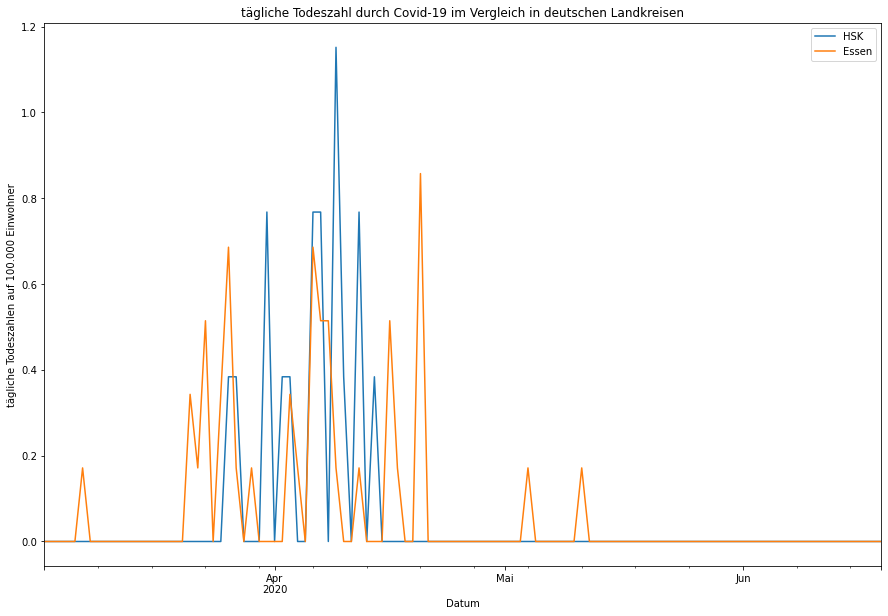

In [9]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl durch Covid-19 im Vergleich in deutschen Landkreisen')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen auf 100.000 Einwohner')

(-0.6910449999999998, 50.0)

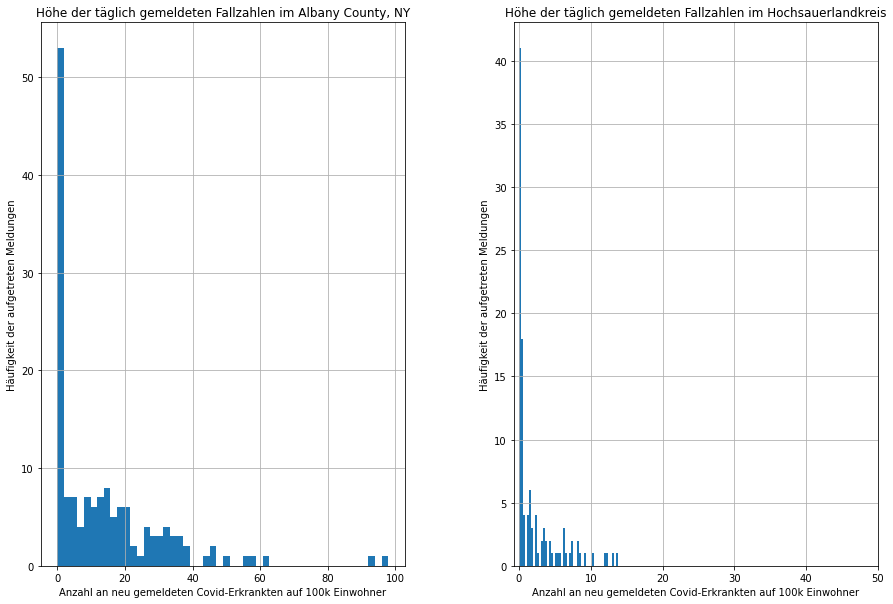

In [10]:
fig, ax = plt.subplots(1, 2,figsize = (15, 10))

dic['Albany County'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im Albany County, NY')

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')
ax[1].set_xlim(right = 50)

Zeigt an dass die meisten täglichen Meldungen Meldungen eine sehr geringe Anzahl an neue Infizierten hatten.
Hat nicht so geklappt wie es sollte. (Sollte Zusammenhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen).
Außerdem zeigt der Vergleich, dass im Albany County täglich höhere neue Fallzahlen gemeldet wurden als im HSK. Wobei es im HSK Maximal zu Tagen mit 15 neuen Fällen kam gibt es im Albany County schon Tage an denen bis zu 40 neue Infizierte gemeldet wurden.

2020-12-01 10:58:42 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-12-01 10:58:42 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-12-01 10:58:42 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-12-01 10:58:42 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Verbindung zwischen Tag und Höhe der Meldungen')

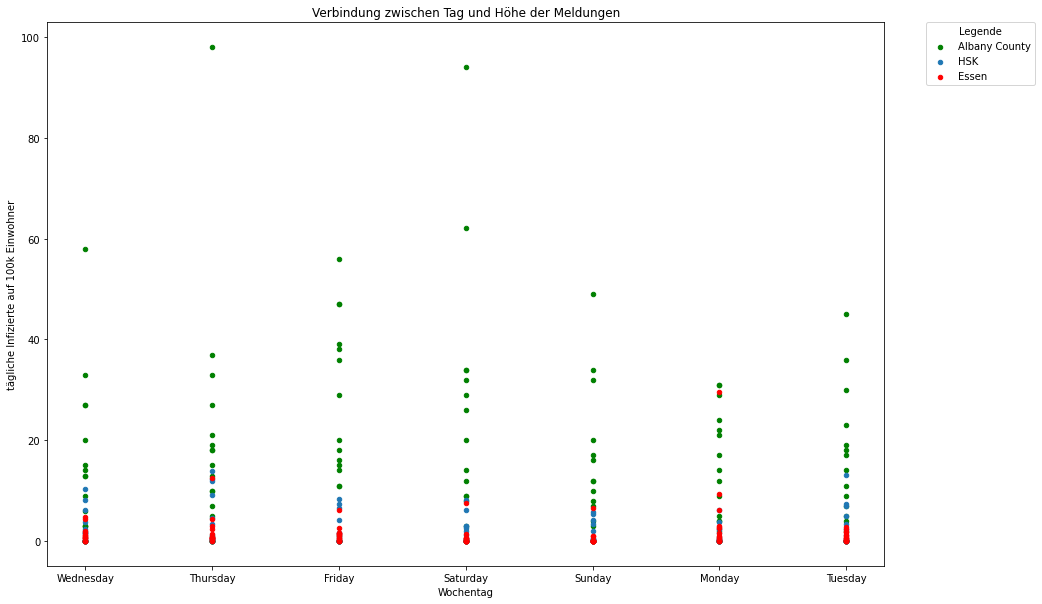

In [11]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
dic['Albany County'].plot(kind='scatter', x = 'Weekday', y= 'dailycases', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
ax.set_xlabel('Wochentag')
ax.set_ylabel('tägliche Infizierte auf 100k Einwohner')
ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [12]:
import statsmodels.formula.api as smf

2020-12-01 11:36:51 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x00000225687A6D88>
2020-12-01 11:36:51 [fiona.env] DEBUG: Starting outermost env
2020-12-01 11:36:51 [fiona.env] DEBUG: No GDAL environment exists
2020-12-01 11:36:51 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x00000225686AB5C8> created
2020-12-01 11:36:51 [fiona._env] DEBUG: Logging error handler pushed.
2020-12-01 11:36:51 [fiona._env] DEBUG: All drivers registered.
2020-12-01 11:36:51 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-12-01 11:36:51 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-12-01 11:36:51 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x00000225686AB5C8>.
2020-12-01 11:36:51 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x00000225686AB5C8> with options

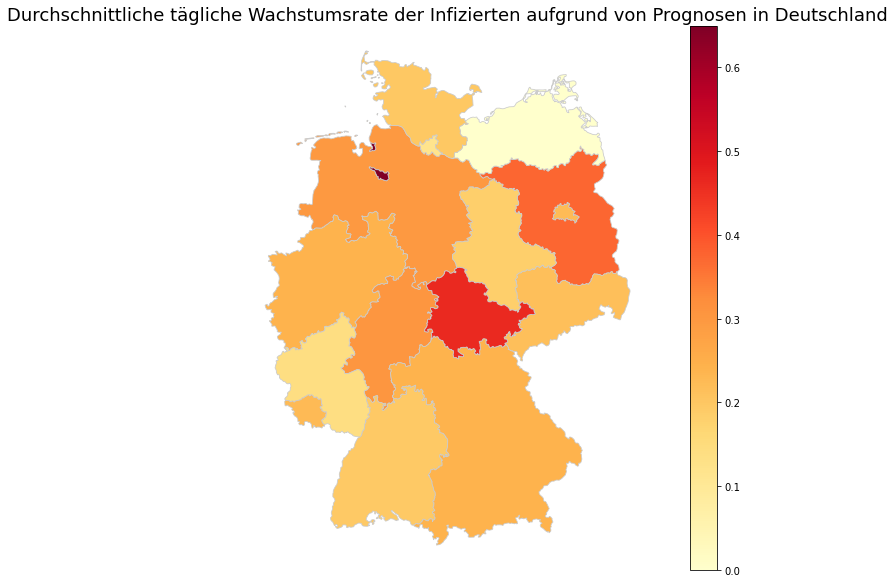

In [54]:
import geopandas as gpd

DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch Thüringen und Bremen im Vergleich sehr hohe. Die Prognosen wurden mithilfe von Linearer Regression und realen Daten, die bis zum 30.06 erhoben wurden, aufgestellt

In [16]:
lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

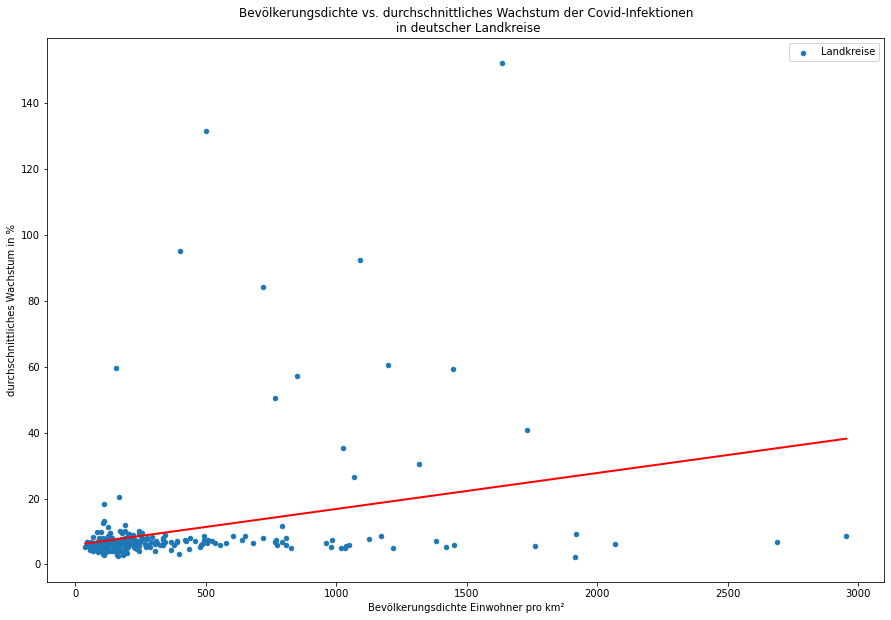

In [17]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")
plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen\n in deutscher Landkreise')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [18]:
print('p-Wert: \n',lm.pvalues)
compLKcorr = compLK.drop(columns=['Landkreise/Kreis'])
print('\nKorrelation: \n',compLKcorr.corr())
lm.summary()

p-Wert: 
 Intercept    8.555534e-07
Dichte       6.543334e-07
dtype: float64

Korrelation: 
                     AGR     AGR_D  Bev.D.Ew./km²
AGR            1.000000  0.494466       0.295578
AGR_D          0.494466  1.000000       0.196714
Bev.D.Ew./km²  0.295578  0.196714       1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGR   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     25.93
Date:                 Di, 01 Dez 2020   Prob (F-statistic):           6.54e-07
Time:                        10:58:44   Log-Likelihood:                -1162.4
No. Observations:                 280   AIC:                             2329.
Df Residuals:                     278   BIC:                             2336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9295      1.177      5.036      0.000       3.612       8.247
Dichte         0.0109      0.002      5.092      0.000       0.007       0.015
==============================================================================
Omnibus:                      336.341   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16257.223
Skew:                           5.399   Prob(JB):                         0.00
Kurtosis:                      38.734   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 5,93+0,011x steigen. Der p-Wert ist sehr gering (0,008), das heißt dass die Beobachtungen die Hypothese, dass es einen Zusammenhang zwischen Bevölkerungsdichte und durchschnittlichen Wachstum der Coronazahlen, nicht unterstützen. Auch die Korrelation unterstützt diese Aussage

In [19]:
for j in range(10):    
    idx = DFCounty['Density'].idxmax()
    DFCounty = DFCounty.drop(idx)
    
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

Ab hier ist zu beachten, dass die Daten der Counties viele Ausreißer haben und damit die grafische Darstellung etwas verzerrt ist und auch das Clustering nicht richtig funktioniert.

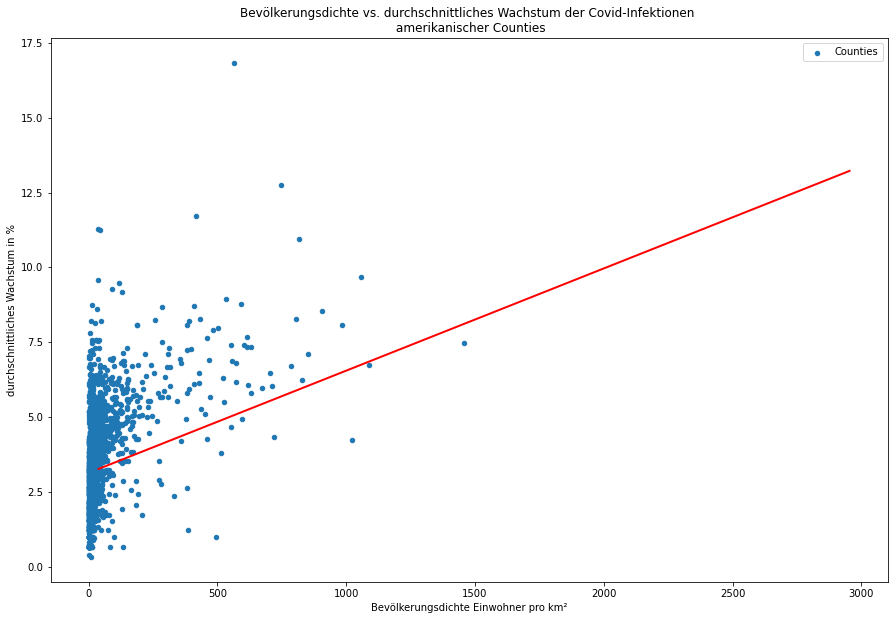

In [20]:
#Hiermit könnte man die 10 am meisten Bevölkerten Counties löschen, da sie das Streudiagramm 
# und die daurauffolgenden Analysen sehr stark bei der grafischen Darstellung beeinflussen

f, ax = plt.subplots(1, 1, figsize = (15, 10))
DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax,label="Counties")
plt.plot(trend, preds2, c='red', linewidth=2)
ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen \n amerikanischer Counties')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [21]:
lm2.params

Intercept    3.274893
Density      0.006821
dtype: float64

Man sieht, dass die zwei Funktionen von deutschen und amerikanischen Gebieten relativ ähnlich verlaufen, jedoch gibt es in Amerika mehr ausreißer. 

In [22]:
from sklearn.cluster import KMeans
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population','State'])
km = KMeans(n_clusters=4)
km.fit(DFCountyfnl)
y_km = km.predict(DFCountyfnl)

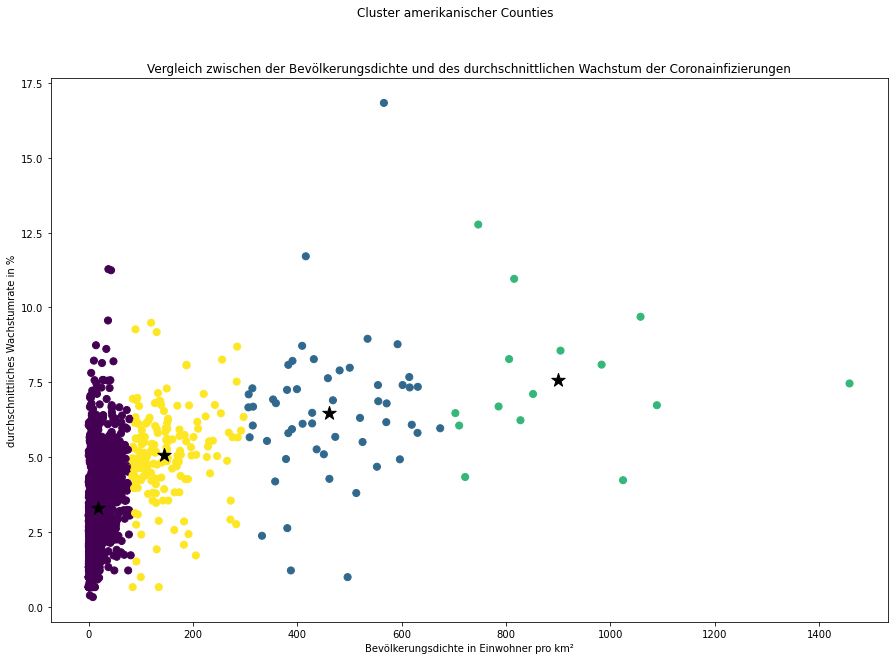

In [23]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyfnl["Density"], DFCountyfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster amerikanischer Counties")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')
#_ =plt.figure(figsize=(30, 25))

Cluster des zuvor erstellen Streudiagramms mit 4 Center. Wie man sieht geben die Daten zum Clustern nicht viel her. Es entstehen keine Gruppierungen sondern, dieser Datensatz ist mehr 1 großes Cluster.

In [24]:
group_state = DFCounty[['AGR','Density','State']].groupby('State')
mean_group_state = group_state.agg(['mean'])
#group_value = group_value.merge(sum_group_state, left_on='State', right_index=True

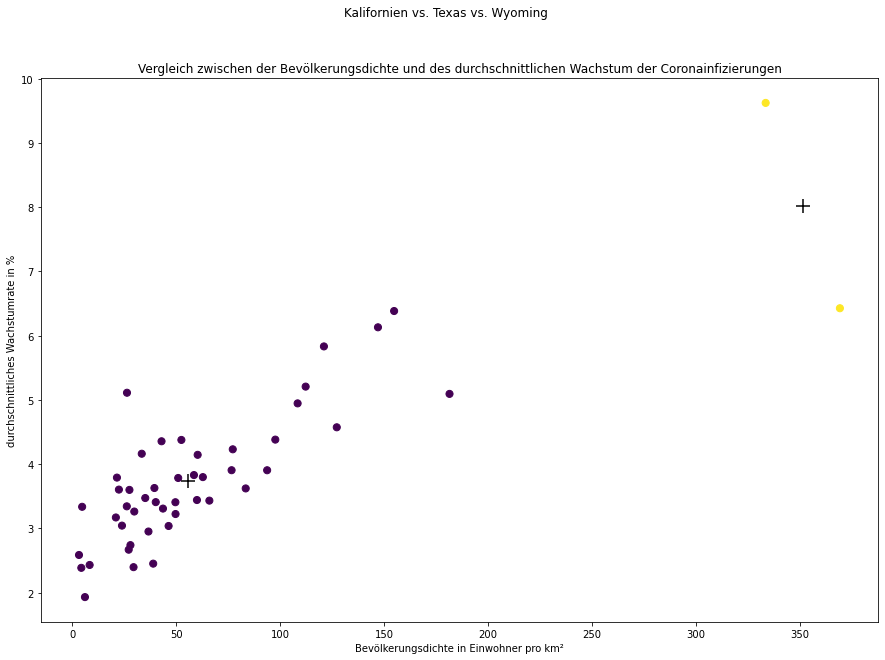

In [25]:
#mean_group_state = mean_group_state.drop(columns=["(AGR, count)"])
km = KMeans(n_clusters=2)
km.fit(mean_group_state)
y_km = km.predict(mean_group_state)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(mean_group_state["Density"], mean_group_state['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='+',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Kalifornien vs. Texas vs. Wyoming")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

Hier habe ich nochmal die Counties von 48 Staaten gruppiert und dann geclustered. Es fehlen Alaska und Louisiana. Die wurden bei der Datenerhebung anscheinend nicht berücksichtigt. Auch hier kann man sehen, dass kein richtiges Muster zu erkennen ist.

In [26]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [27]:
neigh = pd.DataFrame()
DFCountyfnl = DFCountyfnl.fillna(0)
neigh = DFCountyfnl
neigh['Typ'] = 0
neigh = neigh.rename(columns={'Density':'Dichte'})
neighDE = pd.DataFrame()
neighDE = compLKfnl
neighDE['Typ'] = 1
neigh = neigh.append(neighDE)

In [28]:
y = neigh['Typ'].to_numpy()
X = neigh[['AGR','Dichte']].to_numpy()

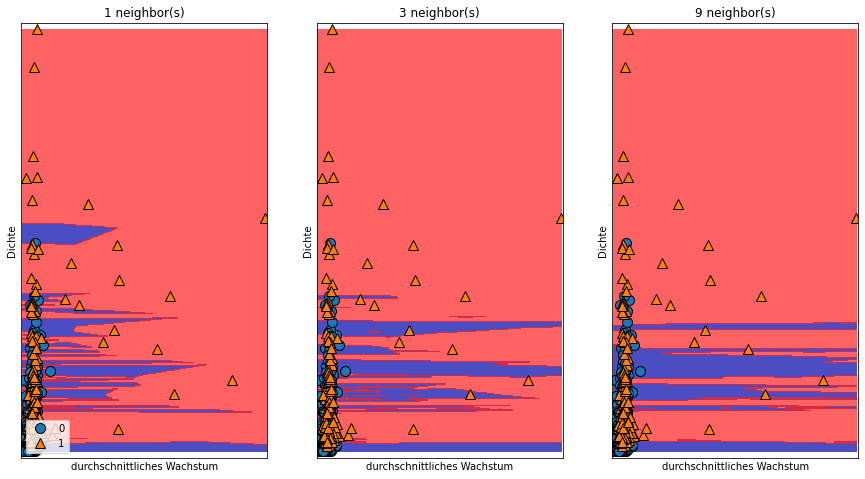

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(15,8))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("durchschnittliches Wachstum")
    ax.set_ylabel("Dichte")
    
axes[0].legend(loc=3)
plt.show()

In [30]:
print("Test set score: {:.5f}".format(score))

Test set score: 0.88723


Neares Neigbor Untersuchung zwischen den zwei Merkmalen Bevölerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Klassen habe ich hierbei. Deutschland = 1 und Amerika = 0 gemacht. Es sollte gesagt werden, dass es mehjr amerikanische Einträge gibt. Über eine bessere Klassenunterteilung sollte man sich auch noch gedanken machen. 
Hierbei ist alles schwer zu Erkennen, da es ein paar Ausreißer gibt. Man sollte überlegen wie viele Außreißer man heraussnimmt. Wie schon bei dem Scatterplot. Auf jeden Fall kann man sehen dass es keinen erkennbaren Unterschied zwischen Landkreisen und Counties gibt.

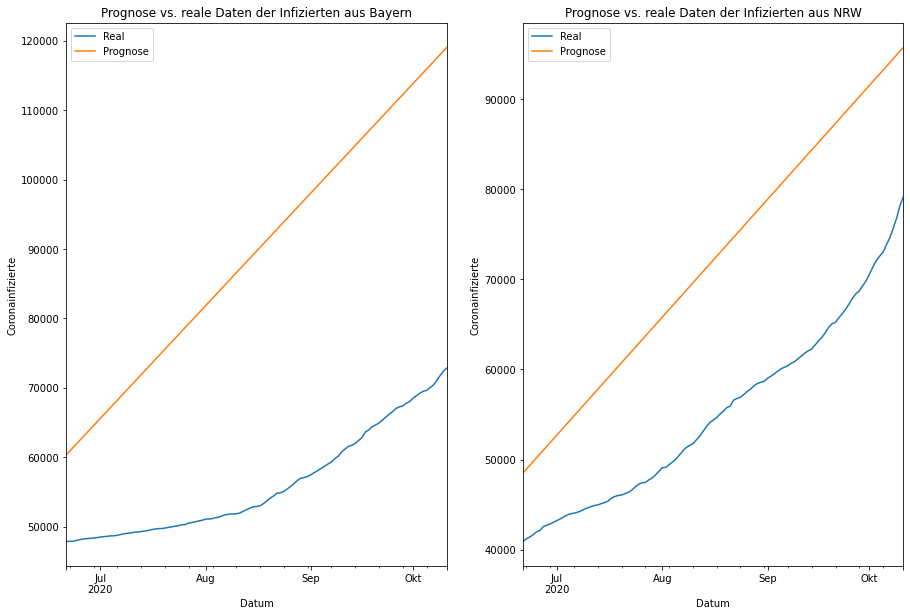

In [51]:
import statsmodels.formula.api as smf

lmBY = smf.ols(formula='BY ~ datef', data=bundzuwachsraw_1).fit()
predBY = lmBY.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictionBY'] = predBY

lmNW = smf.ols(formula='NW ~ datef', data=bundzuwachsraw_1).fit()
predNW = lmNW.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictionNW'] = predNW

f, ax = plt.subplots(1, 2, figsize = (15, 10))

bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'BY', ax=ax[0], label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictionBY', ax=ax[0], label="Prognose")
ax[0].set_title('Prognose vs. reale Daten der Infizierten aus Bayern')
ax[0].set_xlabel('Datum')
ax[0].set_ylabel('Coronainfizierte')

bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'NW', ax=ax[1], label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictionNW', ax=ax[1], label="Prognose")
ax[1].set_title('Prognose vs. reale Daten der Infizierten aus NRW')
ax[1].set_xlabel('Datum')
ax[1].set_ylabel('Coronainfizierte')

plt.show()

Man sieht dass die angeführten Prognose in NRW näher an den realen Daten liegt als Bayern. Beide liegen unter den Prognosen. Das ist gut, jedoch hat Bayern laut dem Bestimmtheismaßes die Epidemie besser im Griff gehabt. Hier könnte man noch das Integral der Zwischenräume bilden um so einen Vergleichswert zu schaffen. Bin aber nicht sicher, wie man an die Funktionen kommt

HSK:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       167.061921         4.467339
std         87.345952         2.845373
min          0.000000         0.000000
25%         95.402600         0.767800
50%        216.527500         6.526500
75%        233.035800         6.526500
max        236.491000         6.526500

Köln:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       166.995412         6.802715
std         78.902228         3.643643
min          0.736900         0.000000
25%        122.413550         3.983725
50%        206.371400         9.026700
75%        225.392000         9.303100
max        236.168800         9.579400


(-0.5618650000000002, 15.0)

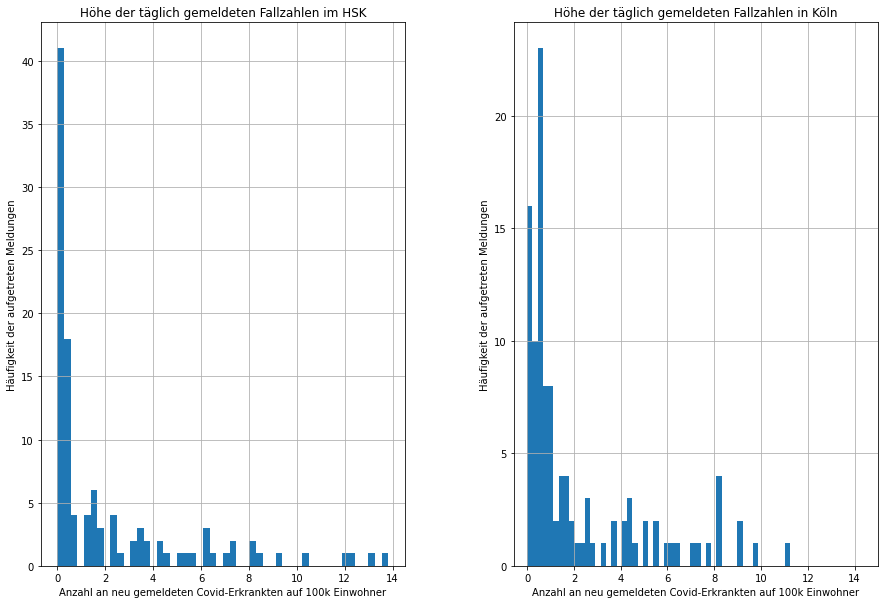

In [32]:
print("HSK:\n",d['Hochsauerlandkreis'][['cases_per_100k','deaths_per_100k']].describe())
print("\nKöln:\n",d['Köln'][['cases_per_100k','deaths_per_100k']].describe())

fig, ax = plt.subplots(1, 2,figsize = (15, 10))

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im HSK')

d['Köln'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen in Köln')
ax[1].set_xlim(right = 15)

Köln und der Hochsauerlandkreis sind sich sehr ähnlich. Was man anhand der describe-Funktion und dem Histogramm sehen kann.